In [1]:
import geopandas as gpd
import glob
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 200)

## Introduction

Reads the data in.

In [3]:
level_1 = gpd.read_file("../output/finished-geojsons/level_1_results.geojson")
level_2 = gpd.read_file("../output/finished-geojsons/level_2_results.geojson")

General data summary: how many cities in each category?

In [4]:
level_2.category.value_counts(normalize=True)

Desierto             0.363388
Desierto Moderado    0.336066
No desierto          0.297814
Sin información      0.002732
Name: category, dtype: float64

In [5]:
level_2[(level_2["size"]=="Grande") & (level_2.category=='Desierto')].sort_values(by='population', ascending=False)

,id,population,category,size,parent_name,name,code,parent_code,geometry
347,347,319035,Desierto,Grande,Zulia,Cabimas,VE2303,VE23,"POLYGON ((-71.17001 10.47595, -71.16936 10.474..."
355,355,234196,Desierto,Grande,Zulia,Mara (San Rafael del Moján),VE2312,VE23,"POLYGON ((-71.96299 11.09648, -71.96102 11.096..."
352,352,232027,Desierto,Grande,Zulia,Lagunillas (Ciudad Ojeda),VE2310,VE23,"POLYGON ((-70.81891 10.46419, -70.81920 10.463..."
260,260,171370,Desierto,Grande,Sucre,Bermúdez (Carúpano),VE1905,VE19,"POLYGON ((-63.21428 10.69245, -63.20896 10.690..."
77,77,167780,Desierto,Grande,Carabobo,Carlos Arvelo (Güigüe),VE0802,VE08,"POLYGON ((-67.70574 10.13785, -67.70391 10.136..."
52,52,165573,Desierto,Grande,Aragua,Zamora (Villa de Cura),VE0516,VE05,"POLYGON ((-67.64845 10.14416, -67.64798 10.144..."
349,349,148724,Desierto,Grande,Zulia,Colón (San Carlos del Zulia),VE2305,VE23,"POLYGON ((-71.77870 9.22481, -71.77512 9.21757..."
354,354,145056,Desierto,Grande,Zulia,Machiques,VE2311,VE23,"POLYGON ((-72.87046 10.35755, -72.86820 10.356..."
169,169,143864,Desierto,Grande,Lara,Morán (El Tocuyo),VE1305,VE13,"POLYGON ((-69.75319 9.98898, -69.75014 9.98689..."
37,37,143692,Desierto,Grande,Aragua,Francisco Linares Alcántara (Santa Rita),VE0517,VE05,"POLYGON ((-67.56201 10.22041, -67.55368 10.218..."


We'll start with a map of Venezuela, empty, which will be filled with colors progressively.

[[], [], Text(0.5, 23.52222222222222, ''), Text(78.48573417158046, 0.5, '')]

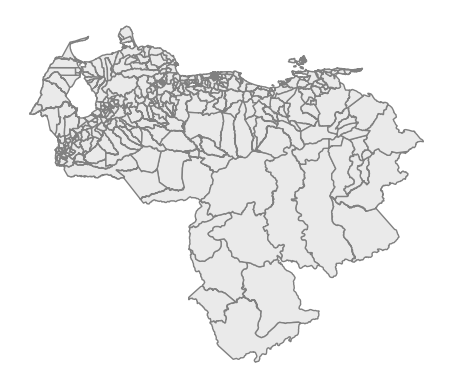

In [6]:
ax = level_2.plot(edgecolor='gray', color='#EAEAEA')
sns.despine(left=True, top=True, bottom=True, right=True)
ax.set(xticks=[], yticks=[], xlabel='', ylabel='')

First, we add the deserts – and introduce them, with a concrete example of each size/classification.

[[], [], Text(0.5, 23.52222222222222, ''), Text(78.41198784346061, 0.5, '')]

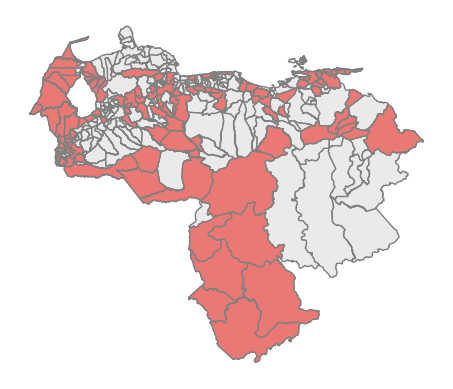

In [7]:
ax = level_2.plot(edgecolor='gray', color='#EAEAEA')
level_2[level_2.category=='Desierto'].plot(color='#EA7875', edgecolor='gray', ax=ax)

sns.despine(left=True, top=True, bottom=True, right=True)
ax.set(xticks=[], yticks=[], xlabel='', ylabel='')

Then, we do the same for the semi deserts – one example of each size.

[[], [], Text(0.5, 23.52222222222222, ''), Text(78.99708494696613, 0.5, '')]

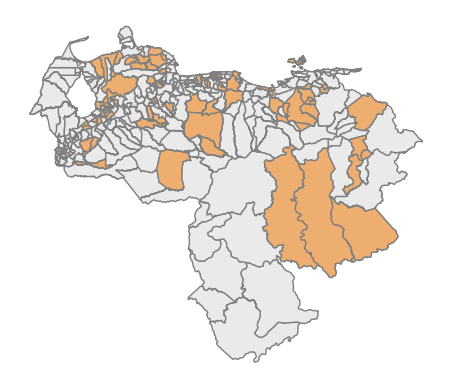

In [8]:
ax = level_2.plot(edgecolor='gray', color='#EAEAEA')
level_2[level_2.category=='Desierto Moderado'].plot(color='#EDAE70', edgecolor='gray', ax=ax)

sns.despine(left=True, top=True, bottom=True, right=True)
ax.set(xticks=[], yticks=[], xlabel='', ylabel='')

Then, we do the same for the not deserts – one example of each size.

[[], [], Text(0.5, 23.52222222222222, ''), Text(79.63989042462232, 0.5, '')]

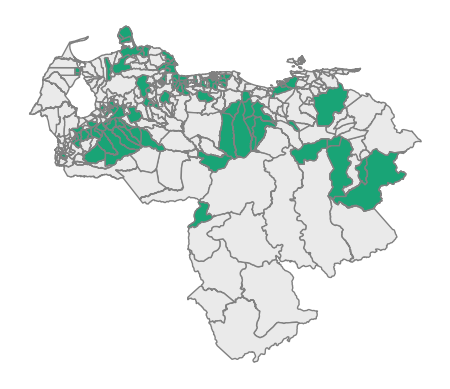

In [9]:
ax = level_2.plot(edgecolor='gray', color='#EAEAEA')
level_2[level_2.category=='No desierto'].plot(color='#19A476', edgecolor='gray', ax=ax)

sns.despine(left=True, top=True, bottom=True, right=True)
ax.set(xticks=[], yticks=[], xlabel='', ylabel='')

We then finally put them all together.

[[], [], Text(0.5, 23.52222222222222, ''), Text(79.63989042462232, 0.5, '')]

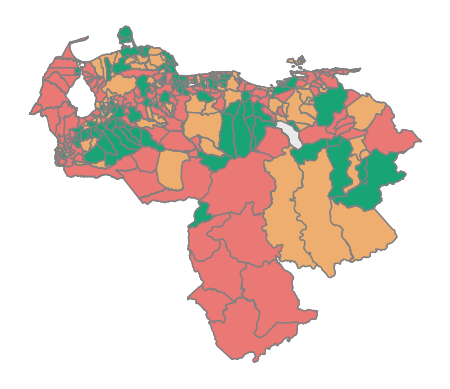

In [10]:
ax = level_2.plot(edgecolor='gray', color='#EAEAEA')

level_2[level_2.category=='Desierto'].plot(color='#EA7875', edgecolor='gray', ax=ax)
level_2[level_2.category=='Desierto Moderado'].plot(color='#EDAE70', edgecolor='gray', ax=ax)
level_2[level_2.category=='No desierto'].plot(color='#19A476', edgecolor='gray', ax=ax)

sns.despine(left=True, top=True, bottom=True, right=True)
ax.set(xticks=[], yticks=[], xlabel='', ylabel='')

We then translate this to a bubble chart that shows *population* instead of area.

In [11]:
centroids = level_2.copy()
centroids.geometry = level_2.geometry.centroid
markersize = centroids.population / 10000


centroids_no_desiertos = centroids[centroids.category=='No desierto']
centroids_desiertos_moderados = centroids[centroids.category=='Desierto Moderado']
centroids_desiertos = centroids[centroids.category=='Desierto']


/var/folders/52/vy6xx2q911l7rd368b7ngb8w0000gn/T/ipykernel_19093/2702457578.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids.geometry = level_2.geometry.centroid


[[], [], Text(0.5, 23.52222222222222, ''), Text(78.52685155778128, 0.5, '')]

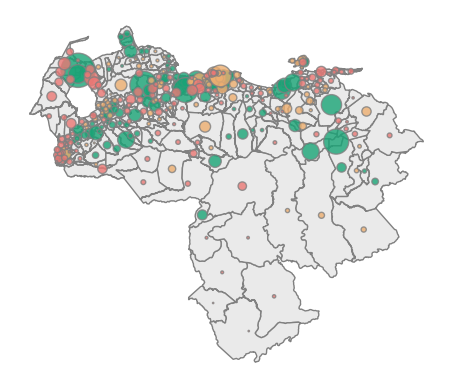

In [12]:
ax = level_2.plot(edgecolor='gray', color='#EAEAEA')

centroids_no_desiertos.plot(markersize=centroids_no_desiertos.population / 3000, color='#19A476', edgecolor='gray', alpha=.8, ax=ax)
centroids_desiertos_moderados.plot(markersize=centroids_desiertos_moderados.population / 3000, color='#EDAE70', alpha=.8, edgecolor='gray', ax=ax)
centroids_desiertos.plot(markersize=centroids_desiertos.population / 3000, color='#EA7875', edgecolor='gray', alpha=.8, ax=ax)

sns.despine(left=True, top=True, bottom=True, right=True)
ax.set(xticks=[], yticks=[], xlabel='', ylabel='')

And move from the map to a circle packing to better reflect the share of population – which we can make in d3.js or in Flourish

In [13]:
level_2[['id', 'population', 'category', 'size', 'parent_name', 'name']].to_csv("../output/bubbles.csv", index=False)

<img src="../output/example-group-bubbles@2x.png">

We can then highlight two elements: the majority of the population lives in an area which is at least moderately desertic, and the majority of smaller cities are deserts.

<img src="../output/bubbles-by-size-group@2x.png">

## Problemas regionales

We also need to see in which regions the problem is larger. To do, we can shift the bubbles to represent one state each.

<img src="../output/groups-by-state@2x.png">

We can then zoom in to show specific regions:
- Amazonas, Zulia, Táchira and Sucre are representative of the overall trend, with large cities that are not desertsand small ones that are.
- Delta Amacuro and Vargas are entirely desertic.

#### 2022 x 2020 comparison

The next file contains a comparison between the classification of every city in 2020 and 2022.

In [14]:
comparison = pd.read_csv("../input/datos-ipys-2020.csv")

We will use it to finally compute how many cities/pop each state has in each category in 2020. This will be useful to make slope charts latter. 

In [15]:
comparison = comparison[['Estado', 'Municipio', 'Tipo Desierto 2020']]

In [16]:
count_2020 = comparison[['Estado', 'Tipo Desierto 2020']].groupby('Estado').value_counts().to_frame().reset_index()

In [17]:
count_2020 = count_2020.pivot(index='Estado', columns='Tipo Desierto 2020', values=0).reset_index()

In [18]:
count_2020 = count_2020.rename(columns={'Estado':'state',
                 'Desierto':'Desiertos',
                 'Desierto moderado':'DesiertosModerados',
                 'No desierto':'NoDesiertos',
                 'Sin información':'SinInformacion'})

In [19]:
count_2022 = level_1[['name',
                      'desert_children', 'moderate_desert_children',
                      'not_desert_children', 'no_information_children']]
count_2022['year'] = 2022
count_2022 = count_2022.rename(columns={
    "name": "state",
    "desert_children":'Desiertos',
    'moderate_desert_children':'DesiertosModerados',
    'not_desert_children':'NoDesiertos',
    'no_information_children':'SinInformacion'
})

/var/folders/52/vy6xx2q911l7rd368b7ngb8w0000gn/T/ipykernel_19093/2290099061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_2022['year'] = 2022


In [20]:
time_comparison = pd.concat([count_2020, count_2022], ignore_index=True, axis=0).fillna(0)
time_comparison = time_comparison.sort_values(by=['state', 'year']).reset_index(drop=True)
time_comparison.to_csv("../code/slopes/comparison.csv", index=False)

We will also do the comparison by population living in each category in each state. There are some particularities on how the data was collected in Vargas and Distrito Capital, since now the classification happens at the parroquia level and not at the city level anymore. This will be accounted for.

In [21]:
poblacion_2020 = pd.read_csv("../input/poblacion-cidade-2020.csv", 
                             usecols=["Estado", "Municipio", "población 2020"],
                             sep="|")

In [22]:
# The cities lost in the merge are all in DC/Vargas
comparison[~comparison.Municipio.isin(comparison.merge(poblacion_2020).Municipio)]

,Estado,Municipio,Tipo Desierto 2020
103,Distrito capital,Parroquia 23 de enero,Sin información
104,Distrito capital,Parroquia Altagracia,Sin información
105,Distrito capital,Parroquia Antímano,Sin información
106,Distrito capital,Parroquia Candelaria,Sin información
107,Distrito capital,Parroquia Caricuao,Sin información
108,Distrito capital,Parroquia Catedral,Sin información
109,Distrito capital,Parroquia Coche,Sin información
110,Distrito capital,Parroquia El Junquito,Sin información
111,Distrito capital,Parroquia El Paraíso,Sin información
112,Distrito capital,Parroquia El Recreo,Sin información


In [23]:
# Creates the df for 2020 population in each category
pop_cat_2020 = poblacion_2020.merge(comparison, on=['Estado', 'Municipio'])

In [24]:
# Manually adding values for the missing states (DC/Vargas)
pop_cat_2020 = pop_cat_2020.append(poblacion_2020.loc[[333, 334]])
pop_cat_2020.loc[[333, 334], 'Tipo Desierto 2020'] = 'No desierto'

/var/folders/52/vy6xx2q911l7rd368b7ngb8w0000gn/T/ipykernel_19093/1928058870.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pop_cat_2020 = pop_cat_2020.append(poblacion_2020.loc[[333, 334]])


In [25]:
# Groups it by state
pop_cat_2020 = pop_cat_2020.groupby(['Estado', 'Tipo Desierto 2020'])['población 2020'].sum().to_frame().reset_index().rename(columns={
    "Estado": "state",
    "Tipo Desierto 2020": "category",
    "población 2020": "population"
    
})
pop_cat_2020["year"] = 2020

In [26]:
# The same for 2022
pop_cat_2022 = level_2.groupby(['parent_name', 'category']).population.sum().to_frame().reset_index().rename(columns={
    "parent_name": "state"
})
pop_cat_2022["year"] = 2022

In [27]:
# Standardizing the category names
pop_cat_2020.category = pop_cat_2020.category.str.lower().str.strip()
pop_cat_2022.category = pop_cat_2022.category.str.lower().str.strip()

In [28]:
# This file will be used for the d3 viz. Let's format it accordingly
time_comparison_pop = pd.concat([pop_cat_2020, pop_cat_2022], axis=0, ignore_index=True)\
    .sort_values(by='state') \
    .reset_index(drop=True) \
    #.reset_index()


time_comparison_pop = time_comparison_pop.replace("Distrito capital", "Distrito Capital")


time_comparison_pop = time_comparison_pop.groupby(['year', 'category', 'state'])['population'].sum() \
    .unstack("category") \
    .fillna(0) \
    .reset_index()

time_comparison_pop = time_comparison_pop.rename(columns={
    'desierto':'Desiertos',
    'desierto moderado':'DesiertosModerados',
    'no desierto':'NoDesiertos',
    'sin información':'SinInformacion'
})

time_comparison_pop.to_csv("../code/slopes/pop-comparison.csv")

In [29]:
# Standardizing the state names
time_comparison_pop.replace("Distrito capital", "Distrito Capital")


category,year,state,Desiertos,DesiertosModerados,NoDesiertos,SinInformacion
0,2020,Amazonas,18715.0,159271.0,24907.0,0.0
1,2020,Anzoátegui,305013.0,813922.0,658881.0,0.0
2,2020,Apure,146640.0,483928.0,0.0,0.0
3,2020,Aragua,792285.0,602219.0,491579.0,0.0
4,2020,Barinas,31249.0,302636.0,627296.0,0.0
5,2020,Bolívar,55123.0,107772.0,1704367.0,25725.0
6,2020,Carabobo,307959.0,479486.0,1610852.0,168525.0
7,2020,Cojedes,332751.0,24571.0,18775.0,0.0
8,2020,Delta Amacuro,7996.0,169024.0,33388.0,0.0
9,2020,Distrito Capital,0.0,0.0,2090479.0,0.0


In [30]:
# One file for the whole venezuela
time_comparison_venezuela = time_comparison_pop.groupby("year").sum().reset_index()
time_comparison_venezuela['state'] = 'Venezuela'
time_comparison_venezuela.to_csv("../code/slopes/entire-venezuela.csv")

/var/folders/52/vy6xx2q911l7rd368b7ngb8w0000gn/T/ipykernel_19093/2983204997.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_comparison_venezuela = time_comparison_pop.groupby("year").sum().reset_index()


In [31]:
time_comparison_venezuela

category,year,Desiertos,DesiertosModerados,NoDesiertos,SinInformacion,state
0,2020,5287827.0,8810486.0,17931593.0,573192.0,Venezuela
1,2022,7025427.0,8081085.0,18203650.0,47689.0,Venezuela


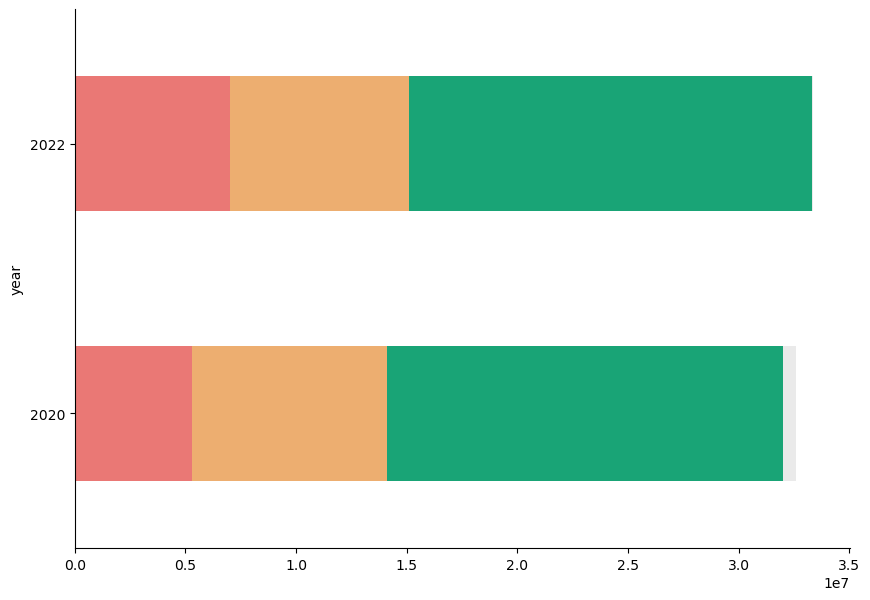

In [32]:
# list of colors for each segment
colors =['#EA7875', '#EDAE70', '#19A476', '#EAEAEA' ]

time_comparison_venezuela.set_index('year', inplace=True)


# plot stacked bar chart
time_comparison_venezuela.plot(kind='barh', stacked=True, color=colors, figsize=(10, 7), legend=False)

sns.despine()

In [33]:
# But we also want to see for ourselves where the variation was larger, so...
pop_variation = pop_cat_2022.merge(pop_cat_2020, on=['state', 'category'], suffixes=['_2022', '_2020'], how='outer') \
    .sort_values(by='state') \
    .fillna(0) \
    .reset_index()

In [34]:
pop_variation['diff'] = pop_variation.population_2022 - pop_variation.population_2020

In [35]:
pop_variation[pop_variation.category=='desierto'].sort_values(by='diff', ascending=False)

,index,state,category,population_2022,year_2022,population_2020,year_2020,diff
79,64,Zulia,desierto,2108433.0,2022.0,929565.0,2020.0,1178868.0
61,51,Sucre,desierto,673082.0,2022.0,146837.0,2020.0,526245.0
70,56,Táchira,desierto,804785.0,2022.0,379839.0,2020.0,424946.0
40,33,Lara,desierto,433869.0,2022.0,177190.0,2020.0,256679.0
73,59,Vargas,desierto,254992.0,2022.0,0.0,0.0,254992.0
7,6,Apure,desierto,330698.0,2022.0,146640.0,2020.0,184058.0
76,61,Yaracuy,desierto,330366.0,2022.0,158399.0,2020.0,171967.0
60,48,Portuguesa,desierto,289301.0,2022.0,143840.0,2020.0,145461.0
49,39,Monagas,desierto,180334.0,2022.0,92585.0,2020.0,87749.0
29,24,Delta Amacuro,desierto,85666.0,2022.0,7996.0,2020.0,77670.0


In [36]:
pop_variation

,index,state,category,population_2022,year_2022,population_2020,year_2020,diff
0,0,Amazonas,desierto,57498.0,2022.0,18715.0,2020.0,38783.0
1,66,Amazonas,desierto moderado,0.0,0.0,159271.0,2020.0,-159271.0
2,1,Amazonas,no desierto,155705.0,2022.0,24907.0,2020.0,130798.0
3,2,Anzoátegui,desierto,174368.0,2022.0,305013.0,2020.0,-130645.0
4,3,Anzoátegui,desierto moderado,449799.0,2022.0,813922.0,2020.0,-364123.0
5,4,Anzoátegui,no desierto,1152649.0,2022.0,658881.0,2020.0,493768.0
6,5,Anzoátegui,sin información,47689.0,2022.0,0.0,0.0,47689.0
7,6,Apure,desierto,330698.0,2022.0,146640.0,2020.0,184058.0
8,7,Apure,desierto moderado,83643.0,2022.0,483928.0,2020.0,-400285.0
9,8,Apure,no desierto,240666.0,2022.0,0.0,0.0,240666.0
